    Current X-axis  Current Y-axis               Ch1               Ch2  \
0             92.0            91.0  5.52381323E-07\n  3.87247701E-06\n   
1             89.0            91.0  5.45441935E-07\n  3.87052341E-06\n   
2             86.0            91.0  5.45972057E-07\n  3.86601459E-06\n   
3             83.0            91.0  5.42575378E-07\n  3.87240061E-06\n   
4             92.0            94.0  5.54587075E-07\n  3.86932015E-06\n   
5             89.0            94.0  5.50198877E-07\n  3.86594002E-06\n   
6             86.0            94.0  5.46540605E-07\n  3.86654119E-06\n   
7             83.0            94.0  5.45949035E-07\n  3.87127466E-06\n   
8             92.0            97.0  5.51090295E-07\n  3.85331850E-06\n   
9             89.0            97.0  5.45772082E-07\n  3.85497015E-06\n   
10            86.0            97.0  5.43282113E-07\n  3.85647400E-06\n   
11            83.0            97.0  5.39355199E-07\n  3.85639805E-06\n   
12            92.0           100.0  5.

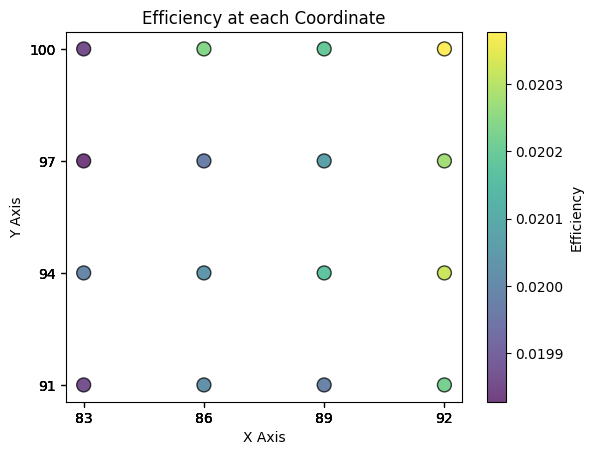

Good Luck!


In [1]:
from pipython import GCSDevice, pitools, datarectools
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import * #QDoubleValidator
import sys
import os
import pyvisa
import pickle
import numpy as np
from time import sleep
import pandas as pd
import math
import matplotlib.pyplot as plt

class Window(QWidget):
    
    def __init__(self):
        super().__init__()
        self.title = 'GUI'
        self.left = 0
        self.top = 0
        self.width = 1080
        self.height = 720
        
        
        # initialization of step sizes of all stages
        self.stepSize_x = 0
        self.stepSize_y = 0
        self.stepSize_z = 0
        
        # initialization of positions of all stages
        self.Xposition = 0
        self.Yposition = 0
        self.Zposition = 0
        self.screen = None

        # initialization of Power of Both channels
        self.power_value1 = 0
        self.power_value2 = 0

        self.measurement_index = 0
        self.beam_ratio_value = 0.00
        self.efficiency = 0.00
        
        self.initUI()
        
        
    def initUI(self):
        self.setWindowTitle(self.title)
        self.setGeometry(self.left, self.top, self.width, self.height)

        layout = QBoxLayout(QBoxLayout.LeftToRight)
        self.setLayout(layout)

        # Groupbox for Input Parameters
        groupbox = QGroupBox("Input Parameters")
        layout.addWidget(groupbox)
        vbox_input = QVBoxLayout()
        groupbox.setLayout(vbox_input)

        self.labelWavelength = QLabel('Wavelength (nm):', self)
        vbox_input.addWidget(self.labelWavelength)
        self.lineeditWavelength = QLineEdit()
        self.lineeditWavelength.setPlaceholderText('Enter WaveLength and Press Enter')
        self.lineeditWavelength.setValidator(QDoubleValidator())
        self.lineeditWavelength.returnPressed.connect(self.return_pressed_wavelentgth)
        vbox_input.addWidget(self.lineeditWavelength)

        self.labelaperture = QLabel('Aperture (mm):', self)
        vbox_input.addWidget(self.labelaperture)
        self.lineeditaperture = QLineEdit()
        self.lineeditaperture.setPlaceholderText('Enter aperture and Press Enter')
        self.lineeditaperture.setValidator(QDoubleValidator())
        self.lineeditaperture.returnPressed.connect(self.return_pressed_aperture)
        vbox_input.addWidget(self.lineeditaperture)
        
        # Groupbox for Actuator
        groupbox = QGroupBox("X-Axis")
        layout.addWidget(groupbox)
        vbox = QVBoxLayout()
        groupbox.setLayout(vbox)


        # Button for forward X-axis
        button_forwardXAxis = QPushButton("Forward X-Axis")
        button_forwardXAxis.clicked.connect(self.XAxisForward)
        button_forwardXAxis.setToolTip("This button is used for moving X-axis in forward direction ")
        
        vbox.addWidget(button_forwardXAxis)

        # Button for backward X-axis
        button_backwardXAxis = QPushButton("Backward X-Axis")
        button_backwardXAxis.clicked.connect(self.XAxisBackward)
        button_backwardXAxis.setToolTip("This button is used for moving X-axis in backward direction ")
        vbox.addWidget(button_backwardXAxis)

        # Step size block
        self.lineedit = QLineEdit()
        self.lineedit.setPlaceholderText('Enter Step Size and Press Enter')
        self.lineedit.setValidator(QDoubleValidator())
        self.lineedit.returnPressed.connect(self.return_pressed_x)
        vbox.addWidget(self.lineedit)

        self.labelX = QLabel('X-Axis Value: 0', self)
        vbox.addWidget(self.labelX)


        # Group box for yth axis
        groupbox = QGroupBox("Y-axis")
        layout.addWidget(groupbox)
        vbox2 = QVBoxLayout()
        groupbox.setLayout(vbox2)

        

         # Button for Forward Y-axis
        button_forwardYAxis = QPushButton("Forward Y-Axis")
        button_forwardYAxis.clicked.connect(self.YAxisForward)
        button_forwardYAxis.setToolTip("This button is used for moving Y-axis in Backward direction ")
        vbox2.addWidget(button_forwardYAxis)

        # Button for Backward Y-axis
        button_backwardYAxis = QPushButton("Backward Y-Axis")
        button_backwardYAxis.clicked.connect(self.YAxisBackward)
        button_backwardYAxis.setToolTip("This button is used for moving Y-axis in Forward direction ")
        vbox2.addWidget(button_backwardYAxis)
        

        # Step size block For Y -axis
        self.lineedit1 = QLineEdit()
        self.lineedit1.setPlaceholderText('Enter Step Size and Press Enter')
        self.lineedit1.setValidator(QDoubleValidator())
        self.lineedit1.returnPressed.connect(self.return_pressed_y)
        vbox2.addWidget(self.lineedit1)

        self.labelY = QLabel('Y-Axis Value: 0', self)
        vbox2.addWidget(self.labelY)

        # Group box for zth axis
        groupbox = QGroupBox("Z-axis")
        layout.addWidget(groupbox)
        vbox3 = QVBoxLayout()
        groupbox.setLayout(vbox3)


         # Button for forward Z-axis
        button_forwardZAxis = QPushButton("Forward Z-Axis")
        button_forwardZAxis.clicked.connect(self.ZAxisForward)
        button_forwardZAxis.setToolTip("This button is used for moving Z-axis in forward direction ")
        vbox3.addWidget(button_forwardZAxis)
        
        # Button for backward Z-axis
        button_backwardZAxis = QPushButton("Backward Z-Axis")
        button_backwardZAxis.clicked.connect(self.ZAxisBackward)
        button_backwardZAxis.setToolTip("This button is used for moving Z-axis in backward direction ")
        vbox3.addWidget(button_backwardZAxis)

        # Step size block For Z -axis
        self.lineedit2 = QLineEdit()
        self.lineedit2.setPlaceholderText('Enter Step Size and Press Enter')
        self.lineedit2.setValidator(QDoubleValidator())
        self.lineedit2.returnPressed.connect(self.return_pressed_z)
        vbox3.addWidget(self.lineedit2)

        self.labelZ = QLabel('Z-Axis Value: 0', self)
        vbox3.addWidget(self.labelZ)

         # Group box for Sensor Measurement
        groupbox = QGroupBox("Sensor Measurement")
        layout.addWidget(groupbox)
        vbox4 = QVBoxLayout()
        groupbox.setLayout(vbox4)

        # Button for Sensor Measurement
        button_sensor1 = QPushButton("Sensor Measurement")
        button_sensor1.clicked.connect(self.power_measurement)
        button_sensor1.setToolTip("This button is used for Taking Sensor measurements")
        vbox4.addWidget(button_sensor1)

        # Button for Beam Splitter Ratio
        button_beam_ration = QPushButton("Beam Ratio")
        button_beam_ration.clicked.connect(self.beam_Ratio)
        button_beam_ration.setToolTip("This button is used for Taking Beam Splitter Ration")
        vbox4.addWidget(button_beam_ration)

        

        # Button for Saving coordinates
        self.value_list = []
        button_measure_button = QPushButton("Coordinate")
        button_measure_button.clicked.connect(self.on_measure_button_clicked)
        button_measure_button.setToolTip("This button is used for taking coordinates")
        vbox4.addWidget(button_measure_button)

        
        button_reference_measure = QPushButton("Reference Measurement")
        button_reference_measure.clicked.connect(self.reference_measurement)
        button_reference_measure.setToolTip("This button is used for Reference measurements")
        vbox4.addWidget(button_reference_measure)

        button_Scan_AOI = QPushButton("DOE Measurement")
        button_Scan_AOI.clicked.connect(self.scan_area)
        button_Scan_AOI.setToolTip("This button is used for DOE measurement")
        vbox4.addWidget(button_Scan_AOI)

        button_Efficiency_Measurement = QPushButton("Efficiency Measurement")
        button_Efficiency_Measurement.clicked.connect(self.efficiency_measurement)
        button_Efficiency_Measurement.setToolTip("This button is used for Getting overall efficiency")
        vbox4.addWidget(button_Efficiency_Measurement)

        # Button for Sensor Measurement
        button_analysis = QPushButton("Analysis")
        button_analysis.clicked.connect(self.analysis)
        button_analysis.setToolTip("This button is used for getting the analysis table")
        vbox4.addWidget(button_analysis)

        
        # self.labelreference = QLabel('Reference Ratio: 0', self)
        self.label1 = QLabel('Sensor 1 Value: 0', self)
        self.label2 = QLabel('Sensor 2 Value: 0', self)
        # vbox4.addWidget(self.labelreference)
        vbox4.addWidget(self.label1)
        vbox4.addWidget(self.label2)
        
        self.label_beam_ratio = QLabel('Beam Ratio: 0', self)
        vbox4.addWidget(self.label_beam_ratio)
        
        self.labelefficiency = QLabel('Overall Effeciency: 0', self)
        vbox4.addWidget(self.labelefficiency)

    
        # self.labelWavelength = QLabel('Wavelength (nm):', self)
        # vbox4.addWidget(self.labelWavelength)
        # self.lineeditWavelength = QLineEdit()
        # self.lineeditWavelength.setPlaceholderText('Enter WaveLength and Press Enter')
        # self.lineeditWavelength.setValidator(QDoubleValidator())
        # self.lineeditWavelength.returnPressed.connect(self.return_pressed_wavelentgth)
        # vbox4.addWidget(self.lineeditWavelength)

        # self.labelaperture = QLabel('Aperture:', self)
        # vbox4.addWidget(self.labelaperture)
        # self.lineeditaperture = QLineEdit()
        # self.lineeditaperture.setPlaceholderText('Enter aperture and Press Enter')
        # self.lineeditaperture.setValidator(QDoubleValidator())
        # self.lineeditaperture.returnPressed.connect(self.return_pressed_aperture)
        # vbox4.addWidget(self.lineeditaperture)

    def show_popup_message(self, message):
         
        app = QApplication(sys.argv)
        
        # Create a QMessageBox
        message_box = QMessageBox()
        message_box.setWindowTitle("Task Completed")
        message_box.setText(message)
        message_box.setIcon(QMessageBox.Information)
        
        # Add a button (optional)
        message_box.addButton(QMessageBox.Ok)
        
        # Show the message box
        result = message_box.exec_()    

     # function for Stepsize Returning
    def return_pressed_x(self):
        self.stepSize_x = float(self.lineedit.text())
        return self.stepSize_x

    
    def XAxisForward(self):
        l = []
        ss = self.stepSize_x
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
            
            
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.

            pidevice.ConnectUSB(serialnum='0115500179')
            pidevice.SVO('1',1)
            # positions = pidevice.qPOS('1')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] + ss
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(3)
            updated_position = pidevice.qPOS('1')
            print('updated position of {} = {:.2f}'.format('X-axis', updated_position['1']))
            self.Xposition = round(float(updated_position['1']),2)
            self.labelX.setText(f'X-Axis Value: {self.Xposition}')

            
            
            # for axis in pidevice.qPOS('1'):

            #     l.append(positions[axis])
            #     print(l)
            # incrementedList = [z + ss for z in l]
            # print(incrementedList)
            # rangemax = [ '%.5f' % elem for elem in incrementedList ]
            # print('input for forward',rangemax)

            # pidevice.MOV('1', rangemax)

            # pitools.waitontarget(pidevice)
            # sleep(3)
            # positions = pidevice.qPOS('1')
            # #print('Positions',positions['1'])
            # print('updated position of {} = {:.2f}'.format('X-axis', positions['1']))
            # position = []
            # for axis in pidevice.qPOS('1'):
            #     print('updated position of axis {} = {:.2f}'.format('X-axis', positions[axis]))
            #     position.append(positions[axis])
            #     print('Test',position)

            
            # self.Xposition = round(float(positions['1']),2)
            # self.labelX.setText(f'X-Axis Value: {self.Xposition}')
            #QMessageBox.information(self,'Actuator axes information', "axes moved forward to positions : "+ strPositons)

    
    def XAxisBackward(self):

        l = []
        ss = self.stepSize_x
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.

            pidevice.ConnectUSB(serialnum='0115500179')
            pidevice.SVO('1',1)
            # positions = pidevice.qPOS('1')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] - ss
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(3)
            updated_position = pidevice.qPOS('1')
            print('updated position of {} = {:.2f}'.format('X-axis', updated_position['1']))
            self.Xposition = round(float(updated_position['1']),2)
            self.labelX.setText(f'X-Axis Value: {self.Xposition}')


            
            
            # positions = pidevice.qPOS('1')
            # for axis in pidevice.qPOS('1'):

            #     l.append(positions[axis])
            #     print(l)
            # incrementedList = [z - ss for z in l]
            # # print(incrementedList)
            # # rangemax = [ '%.5f' % elem for elem in incrementedList ]
            # positions = pidevice.qPOS('1')
            
            # rangemax = positions['1'] - ss
            # print('input for movement',rangemax)
            # pidevice.MOV('1', rangemax)

            # # pitools.waitontarget(pidevice)
            # sleep(3)
            # positions = pidevice.qPOS('1')
            # print('updated position of {} = {:.2f}'.format('X-axis', positions['1']))
            # # position = []
            # # for axis in pidevice.qPOS('1'):
            # #     print('updated position of axis {} = {:.2f}'.format('X-axis', positions[axis]))
            # #     position.append(positions[axis])
            # #     print('Test',position)

            # # strPositons = str(positions['1'])
            # self.Xposition = round(float(positions['1']),2)
            # self.labelX.setText(f'X-Axis Value: {self.Xposition}')
            #QMessageBox.information(self,'Actuator axes information', "axes moved forward to positions : "+ strPositons)


     # function for Stepsize Returning
    def return_pressed_y(self):
        self.stepSize_y = float(self.lineedit1.text())
        return self.stepSize_y
    def YAxisForward(self):
        
        l = []
        ss = self.stepSize_y
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.DD']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.
            
            pidevice.ConnectUSB(serialnum='0135500452')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] + ss
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(3)
            updated_position = pidevice.qPOS('1')
            print('updated position of axis {} = {:.2f}'.format('Y-axis', updated_position['1']))
            self.Yposition = round(float(updated_position['1']),2)
            self.labelY.setText(f'Y-Axis Value: {self.Yposition}')
            
            # positions = pidevice.qPOS('1')
            # for axis in pidevice.qPOS('1'):

            #     l.append(positions[axis])
            #     print(l)
            # incrementedList = [z + ss for z in l]
            # print(incrementedList)
            # rangemax = [ '%.5f' % elem for elem in incrementedList ]


            # pidevice.MOV('1', rangemax)

            # # pitools.waitontarget(pidevice)
            # sleep(3)

            # positions = pidevice.qPOS('1')
            # print('updated position of axis {} = {:.2f}'.format('Y-axis', positions['1']))
            # for axis in pidevice.qPOS('1'):
            #     print('updated position of axis {} = {:.2f}'.format('Y-axis', positions[axis]))
            #     position.append(positions[axis])

            # strPositons = str(positions['1'])
            # self.Yposition = round(float(positions['1']),2)
            # self.labelY.setText(f'Y-Axis Value: {self.Yposition}')
            #QMessageBox.information(self,'Actuator axes information', "axes moved forward to positions : "+ strPositons)
        
    def YAxisBackward(self):

        l = []
        ss = self.stepSize_y
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.DD']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.
            
            pidevice.ConnectUSB(serialnum='0135500452')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] - ss
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(3)
            updated_position = pidevice.qPOS('1')
            print('updated position of axis {} = {:.2f}'.format('Y-axis', updated_position['1']))
            self.Yposition = round(float(updated_position['1']),2)
            self.labelY.setText(f'Y-Axis Value: {self.Yposition}')
            
            # positions = pidevice.qPOS('1')
            # for axis in pidevice.qPOS('1'):

            #     l.append(positions[axis])
            #     print(l)
            # incrementedList = [z - ss for z in l]
            # print(incrementedList)
            # rangemax = [ '%.5f' % elem for elem in incrementedList ]


            # pidevice.MOV('1', rangemax)

            # # pitools.waitontarget(pidevice)
            # sleep(3)

            # positions = pidevice.qPOS('1')
            # print('updated position of axis {} = {:.2f}'.format('Y-axis', positions['1']))
            
            # position = []
            # for axis in pidevice.qPOS('1'):
            #     print('updated position of axis {} = {:.2f}'.format('Y-axis', positions[axis]))
            #     position.append(positions[axis])

            # strPositons = str(positions['1'])
            # self.Yposition = round(float(positions['1']),2)
            # self.labelY.setText(f'Y-Axis Value: {self.Yposition}')
            #QMessageBox.information(self,'Actuator axes information', "axes moved forward to positions : "+ strPositons)


     # function for Stepsize Returning
    def return_pressed_z(self):
        self.stepSize_z = float(self.lineedit2.text())
        return self.stepSize_z
    
    def ZAxisForward(self):
        l = []
        ss = self.stepSize_z
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.

            pidevice.ConnectUSB(serialnum='0095500784')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] + ss
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(3)
            updated_position = pidevice.qPOS('1')
            print('updated position of axis {} = {:.2f}'.format('Z-axis', updated_position['1']))

            self.Zposition = round(float(updated_position['1']),2)
            self.labelZ.setText(f'Z-Axis Value: {self.Zposition}')
            # positions = pidevice.qPOS('1')
            # for axis in pidevice.qPOS('1'):
                
            #     l.append(positions[axis])
            #     print(l)
            # incrementedList = [z + ss for z in l]
            # print(incrementedList)
            # rangemax = [ '%.5f' % elem for elem in incrementedList ]


            # pidevice.MOV('1', rangemax)

            # # pitools.waitontarget(pidevice)
            # sleep(3)

            # positions = pidevice.qPOS('1')
            # print('updated position of axis {} = {:.2f}'.format('Z-axis', positions['1']))
            # for axis in pidevice.qPOS('1'):
            #     print('updated position of axis {} = {:.2f}'.format('Z-axis', positions[axis]))
            #     position.append(positions[axis])
                
            # strPositons = str(positions['1'])
            # self.Zposition = round(float(positions['1']),2)
            # self.labelZ.setText(f'Z-Axis Value: {self.Zposition}')
            #QMessageBox.information(self,'Actuator axes information', "axes moved forward to positions : "+ strPositons)
    def ZAxisBackward(self):

        l = []
        ss = self.stepSize_z
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.

            pidevice.ConnectUSB(serialnum='0095500784')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] - ss
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(3)
            updated_position = pidevice.qPOS('1')
            print('updated position of axis {} = {:.2f}'.format('Z-axis', updated_position['1']))

            self.Zposition = round(float(updated_position['1']),2)
            self.labelZ.setText(f'Z-Axis Value: {self.Zposition}')
            
            # positions = pidevice.qPOS('1')
            # for axis in pidevice.qPOS('1'):

            #     l.append(positions[axis])
            #     print(l)
            # incrementedList = [z - ss for z in l]
            # print(incrementedList)
            # rangemax = [ '%.5f' % elem for elem in incrementedList ]


            # pidevice.MOV('1', rangemax)

            # # pitools.waitontarget(pidevice)
            # sleep(3)

            # positions = pidevice.qPOS('1')
            # print('updated position of axis {} = {:.2f}'.format('Z-axis', positions['1']))
            # # for axis in pidevice.qPOS('1'):
            # #     print('updated position of axis {} = {:.2f}'.format('Z-axis', positions[axis]))
            # #     position.append(positions[axis])

            # # strPositons = str(positions['1'])
            # self.Zposition = round(float(positions['1']),2)
            # self.labelZ.setText(f'Z-Axis Value: {self.Zposition}')
            #QMessageBox.information(self,'Actuator axes information', "axes moved forward to positions : "+ strPositons)


    def power_measurement(self):
        rm = pyvisa.ResourceManager()
        # List all connected resources
        # print("Resources detected\n{}\n".format(rm.list_resources()))
        # print("Opening connection...")
        instrument = rm.open_resource('USB0::0x1313::0x8022::M00533936::INSTR', timeout=5000)
        
        # print("Sending command...")
        command1 = ':POW1:VAL?'
        self.power_value1 = instrument.query(command1)
        command2 = ':POW2:VAL?'
        self.power_value2 = instrument.query(command2)
        
        # print(f"Sensor 1: {self.power_value1}")
        # print(f"Sensor 2: {self.power_value2}")
        
        # print("Closing connection...")
        instrument.close()
        self.label1.setText(f'Sensor_1 Value: {self.power_value1}')
        self.label2.setText(f'Sensor_2 Value: {self.power_value2}')
        return self.power_value1, self.power_value2
        
    def reference_measurement(self):
        self.reference = float(self.power_value1)/float(self.power_value2)
        self.labelreference.setText(f'Refernece Value: {self.reference}')
        return self.reference


    # function for Stepsize Returning
    def return_pressed_wavelentgth(self):
        self.wavelength = float(self.lineeditWavelength.text())
        self.wavelength = self.wavelength * (1E-9)
        return self.wavelength

    def on_measure_button_clicked(self):
        
        measurement = {
            'measurement_index': self.measurement_index,
            'X-axis': self.Xposition,
            'Y-axis': self.Yposition,
            'Z-axis': self.Zposition,
            'Ch1': self.power_value1,
            'Ch2': self.power_value2,
            'Aperture': self.aperture
        }
        self.value_list.append(measurement)
        # print("Measurement appended to the list:", measurement)

        print("list:", self.value_list)

        # Increment measurement index for the next measurement
        self.measurement_index += 1

        with open('Coordinates.pkl', 'wb') as file:
            pickle.dump(self.value_list, file)

    # function for Stepsize Returning
    def return_pressed_aperture(self):
        self.aperture = float(self.lineeditaperture.text())
        return self.aperture

    def beam_Ratio(self):
        self.beam_ratio_value = float(self.power_value1)/float(self.power_value2)
        self.label_beam_ratio.setText(f'Beam Ratio: {self.beam_ratio_value}')
        return self.beam_ratio_value


    
    def XAxisForward_scan(self,step):
        
        # print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
            
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.
        
            pidevice.ConnectUSB(serialnum='0115500179')
            current_position = pidevice.qPOS('1')
            
            rangemax = current_position['1'] + step
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(1.25)
            updated_position = pidevice.qPOS('1')
            
            return current_position['1'],updated_position['1']
    

            

    def XAxisBackward_scan(self,step):
        
        
    
        # print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
            
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.
    
            pidevice.ConnectUSB(serialnum='0115500179')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] - step
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(1.25)
            updated_position = pidevice.qPOS('1')
            return current_position['1'],updated_position['1']

    def YAxisForward_scan(self, step):
        

        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.DD']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.
            
            pidevice.ConnectUSB(serialnum='0135500452')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] + step
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(1.25)
            updated_position = pidevice.qPOS('1')
            return current_position['1'],updated_position['1']
            
    def YAxisBackward_scan(self,step):

        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.DD']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.
            
            pidevice.ConnectUSB(serialnum='0135500452')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] - step
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(1.25)
            updated_position = pidevice.qPOS('1')
            return current_position['1'],updated_position['1']

    def reference_measurement(self):
        a,b = self.power_measurement()
        measurement_list = []
        
        measurement = {
     
                        'Ch1': a,
                        'Ch2': b
                    }
        
        measurement_list.append(measurement)
        with open('Measurement_Reference.pkl', 'wb') as file:
            pickle.dump(measurement_list, file)
        QMessageBox.information(self,'Measurement Information','Reference Measurement Done')
            
        # def frange(start, stop, step):
        #     while start < stop:
        #         yield start
        #         start += step
        
        # measurement_list = []
        
        # # list1 = loaded_list # for testing
        # with open('Coordinates.pkl', 'rb') as f:
        #     list1 = pickle.load(f) # for actual
            
        # x1 = list1[0]['X-axis']
        # # x1 = float(x1.strip('[]'))
        # print('Starting X Axis position',x1)
        # x2 = list1[1]['X-axis']
        # # x2 = float(x2.strip('[]'))
        # print('Ending X-Axis position',x2)
        # diff_x = round((x2-x1),2)
        # # print('diff_x',diff_x)
        # y1 = list1[0]['Y-axis']
        # # y1 = float(y1.strip('[]'))
        # y4 = list1[2]['Y-axis']
        # # y4 = float(y4.strip('[]'))
        # print('Starting Y Axis position',y1)
        # print('Ending Y-Axis position',y4)
        # diff_y = round((y4-y1),2)
        # # print('diff_y',diff_y)
        # x_step = list1[0]['Aperture']
        # # print('x_step',x_step)
        # y_step = list1[0]['Aperture']
        # print('Loop will b starting starting')
        # current_y_position = y1
        # updated_y_position = y1
        # for y in np.arange(0, (diff_y+y_step),y_step):
        
        #     if y<=diff_y:
              
        #         for x in np.arange(0, (diff_x+x_step),x_step):
                    
        #             if x<=diff_x:
                        
        #                 # print('Current X-axis Position',x)
        #                 current_x_position, updated_x_position = self.XAxisForward_scan(x_step)
        #                 a,bt() = self.power_measuremen
        #                 measurement = {
        #                 'Current X-axis': round(current_x_position,2),
        #                     # 'Updated X-axis': updated_x_position,    
        #                 'Current Y-axis': round(updated_y_position,2),
        #                     # 'Updated Y-axis': updated_y_position,
        #                 'Ch1': a,
        #                 'Ch2': b
        #             }
                        
        #                 measurement_list.append(measurement)
        #                 print(measurement)
        #             else:
        #                 break
        #             # print(effeciency_list)
        #             # print('Updated X-axis Position',x+x_step)
                  
        #         self.XAxisBackward_scan(diff_x+x_step)
        #         print('Xaxis moved backward')
                
        #         current_y_position, updated_y_position = self.YAxisForward_scan(y_step)
        #         print('Yaxis moved forward one step')
             
        # self.YAxisBackward_scan(diff_y+y_step)
        # print('Yaxis moved to original position')
        
        # with open('Measurement_Reference.pkl', 'wb') as file:
        #     pickle.dump(measurement_list, file)
        # QMessageBox.information(self,'Measurement Information','Reference Measurement Done')
    def scan_area(self):
          

        def frange(start, stop, step):
            while start < stop:
                yield start
                start += step
        
        measurement_list = []
        
        # list1 = loaded_list # for testing
        with open('Coordinates.pkl', 'rb') as f:
            list1 = pickle.load(f) # for actual
            
        x1 = list1[0]['X-axis']
        # x1 = float(x1.strip('[]'))
        print('Starting X Axis position',x1)
        x2 = list1[1]['X-axis']
        # x2 = float(x2.strip('[]'))
        print('Ending X-Axis position',x2)
        diff_x = round((x1-x2),2)
        # print('diff_x',diff_x)
        y1 = list1[0]['Y-axis']
        # y1 = float(y1.strip('[]'))
        y4 = list1[2]['Y-axis']
        # y4 = float(y4.strip('[]'))
        print('Starting Y Axis position',y1)
        print('Ending Y-Axis position',y4)
        diff_y = round((y4-y1),2)
        # print('diff_y',diff_y)
        x_step = list1[0]['Aperture']
        # print('x_step',x_step)
        y_step = list1[0]['Aperture']
        print('Efficiency Algorithm starting')
        current_y_position = y1
        updated_y_position = y1
        
        
        for y in np.arange(0, (diff_y+y_step),y_step):
            
            
        
            if y<=diff_y:
              
                for x in np.arange(0, (diff_x+x_step),x_step):
                    
                    
                    if x<=diff_x:
                        
                        # print('Current X-axis Position',x)
                        efficiency = 0
                        current_x_position, updated_x_position = self.XAxisBackward_scan(x_step)
                        sensor1_value,sensor2_value = self.power_measurement()
                        efficiency = (float(sensor1_value)/float(sensor2_value)) * float(self.beam_ratio_value)
                        measurement = {
                        'Current X-axis': round(current_x_position,2),
                            # 'Updated X-axis': updated_x_position,    
                        'Current Y-axis': round(updated_y_position,2),
                            # 'Updated Y-axis': updated_y_position,
                        'Ch1': sensor1_value,
                        'Ch2': sensor2_value,
                        'Efficiency':efficiency}
                        
                        measurement_list.append(measurement)
                        print(measurement)
                    else:
                        break
                    # print(effeciency_list)
                    # print('Updated X-axis Position',x+x_step)
                  
                self.XAxisForward_scan(diff_x+x_step)
                print('Xaxis moved Forward to X1')
                
                current_y_position, updated_y_position = self.YAxisForward_scan(y_step)
                print('Yaxis moved forward one step')
             
        self.YAxisBackward_scan(diff_y+y_step)
        print('Yaxis moved to Y1')
        with open('Measurement_DOE.pkl', 'wb') as file:
            pickle.dump(measurement_list, file)
        QMessageBox.information(self,'Measurement Information','DOE Measurement Done')

    def efficiency_measurement(self):
        with open('Measurement_DOE.pkl', 'rb') as f:
            Measurement_DOE = pickle.load(f)
        with open('Measurement_Reference.pkl', 'rb') as f:
            Measurement_Reference = pickle.load(f)
        key_sensor= 'Ch1'
        sensor_value_Reference = [float(d[key_sensor]) for d in Measurement_Reference]
        sum_sensor_Reference = sum(sensor_value_Reference)
        sensor_value_DOE = [float(d[key_sensor]) for d in Measurement_DOE]
        sum_sensor_DOE = sum(sensor_value_DOE)
        self.efficiency = sum_sensor_Reference/sum_sensor_DOE
        print(f'Efficiency:',round(self.efficiency,3))
        self.labelefficiency.setText(f'Overall Value: {self.efficiency}')
    def analysis(self):
        # Load the data from the pickle file
        with open('Measurement_DOE.pkl', 'rb') as file:
            data = pd.read_pickle(file)
        
        # Convert the data to a DataFrame (assuming it's a dictionary or a list of dictionaries)
        df = pd.DataFrame(data)
        
        # Save the DataFrame to a CSV file
        # df.to_csv('output_file.csv', index=False)
        print(df)
        
        plt.xticks(df['Current X-axis'])
        plt.yticks(df['Current Y-axis'])
        # Create a scatter plot
        plt.scatter(df['Current X-axis'], df['Current Y-axis'], c=df['Efficiency'], cmap='viridis', s=100, edgecolors='k', linewidths=1, alpha=0.75)
        
        # Add labels and a colorbar
        plt.xlabel('X Axis')
        plt.ylabel('Y Axis')
        plt.title('Efficiency at each Coordinate')
        plt.colorbar(label='Efficiency')
        
        # # Show the plot
        plt.show()

app = QApplication(sys.argv)
screen = Window()
screen.show()
try:
    sys.exit(app.exec_())
except SystemExit:    
    print('Good Luck!')      

In [ ]:
from pipython import GCSDevice, pitools, datarectools
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import * #QDoubleValidator
import sys
import os
import pyvisa
import pickle
import numpy as np
from time import sleep

with open('AOI.pkl', 'rb') as f:
    list1 = pickle.load(f)
list1
def power_measurement():
        rm = pyvisa.ResourceManager()
        # List all connected resources
        # print("Resources detected\n{}\n".format(rm.list_resources()))
        # print("Opening connection...")
        instrument = rm.open_resource('USB0::0x1313::0x8022::M00533936::INSTR', timeout=5000)
        
        # print("Sending command...")
        command1 = ':POW1:VAL?'
        power_value1 = instrument.query(command1)
        command2 = ':POW2:VAL?'
        power_value2 = instrument.query(command2)
        
        # print(f"Sensor 1: {power_value1}")
        # print(f"Sensor 2: {power_value2}")
        
        # print("Closing connection...")
        instrument.close()
        # self.label1.setText(f'Sensor_1 Value: {self.power_value1}')
        # self.label2.setText(f'Sensor_2 Value: {self.power_value2}')
        return power_value1, power_value2
def XAxisForward_scan(step):
        # print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
        # InterfaceSetupDlg() is an interactive dialog. There are other methods to
        # connect to an interface without user interaction.
        
            pidevice.ConnectUSB(serialnum='0115500179')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] + step
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(0.5)
            updated_position = pidevice.qPOS('1')
            return current_position['1'],updated_position['1']

def YAxisForward_scan(step):

    CONTROLLERNAME = 'C-863'  # 'C-884' will also work
    STAGES = ['M-521.DD']
    REFMODE = ('REF')
    with GCSDevice(CONTROLLERNAME) as pidevice:
    # InterfaceSetupDlg() is an interactive dialog. There are other methods to
    # connect to an interface without user interaction.
        
        pidevice.ConnectUSB(serialnum='0135500452')
        current_position = pidevice.qPOS('1')
        rangemax = current_position['1'] + step


        pidevice.MOV('1', rangemax)
        # pitools.waitontarget(pidevice)
        sleep(0.5)
        updated_position = pidevice.qPOS('1')
        return current_position['1'],updated_position['1']
def YAxisBackward_scan(step):

    CONTROLLERNAME = 'C-863'  # 'C-884' will also work
    STAGES = ['M-521.DD']
    REFMODE = ('REF')
    with GCSDevice(CONTROLLERNAME) as pidevice:
    # InterfaceSetupDlg() is an interactive dialog. There are other methods to
    # connect to an interface without user interaction.
        
        pidevice.ConnectUSB(serialnum='0135500452')
        current_position = pidevice.qPOS('1')
        rangemax = current_position['1'] - step


        pidevice.MOV('1', rangemax)
        # pitools.waitontarget(pidevice)
        sleep(0.5)
        updated_position = pidevice.qPOS('1')
        return current_position['1'],updated_position['1']

def XAxisBackward_scan(step):
    
    # print('step Size', ss)
    CONTROLLERNAME = 'C-863'  # 'C-884' will also work
    STAGES = ['M-521.PD1']
    REFMODE = ('REF')
    with GCSDevice(CONTROLLERNAME) as pidevice:
    # InterfaceSetupDlg() is an interactive dialog. There are other methods to
    # connect to an interface without user interaction.

        pidevice.ConnectUSB(serialnum='0115500179')
        current_position = pidevice.qPOS('1')
        rangemax = current_position['1'] - step


        pidevice.MOV('1', rangemax)
        # pitools.waitontarget(pidevice)
        sleep(0.5)
        updated_position = pidevice.qPOS('1')
        return current_position['1'],updated_position['1']


def scan_area():
        def frange(start, stop, step):
            while start < stop:
                yield start
                start += step
        
        effeciency_list = []
        # list1 = loaded_list # for testing
        # list1 = value_list # for actual
        x1 = list1[0]['X-axis']
        x1 = float(x1.strip('[]'))
        print('Starting X Axis position',x1)
        x2 = list1[1]['X-axis']
        x2 = float(x2.strip('[]'))
        print('Ending X-Axis position',x2)
        diff_x = round((x2-x1),2)
        # print('diff_x',diff_x)
        y1 = list1[0]['Y-axis']
        y1 = float(y1.strip('[]'))
        y4 = list1[2]['Y-axis']
        y4 = float(y4.strip('[]'))
        print('Starting Y Axis position',y1)
        print('Ending Y-Axis position',y4)
        diff_y = round((y4-y1),2)
        # print('diff_y',diff_y)
        x_step = list1[0]['Aperture']
        # print('x_step',x_step)
        y_step = list1[0]['Aperture']
        print('Loop will b starting starting')
        current_y_position = y1
        updated_y_position = y1
        for y in np.arange(0, (diff_y+y_step),y_step):
            
            if y<=diff_y:
                     
                # print('Current Y-axis Position',y)
                
              
                for x in np.arange(0, (diff_x+x_step),x_step):
                    if x<=diff_x:
                        # print('Current X-axis Position',x)
                        current_x_position, updated_x_position = XAxisForward_scan(x_step)
                        a,b = power_measurement()
                        measurement = {
                        'Current X-axis': current_x_position,
                            # 'Updated X-axis': updated_x_position,    
                        'Current Y-axis': updated_y_position,
                            # 'Updated Y-axis': updated_y_position,
                        'Ch1': a,
                        'Ch2': b
                    }
                        
                        effeciency_list.append(measurement)
                        print(measurement)
                    else:
                        break
                    # print(effeciency_list)
                    # print('Updated X-axis Position',x+x_step)
                  
                XAxisBackward_scan(diff_x+x_step)
                print('Xaxis moved backward')
                
                current_y_position, updated_y_position = YAxisForward_scan(y_step)
                print('Yaxis moved forward one step')
             # Move to next x-position
            # print('y+y_step',y_step)
            # print('diff',diff)
            # self.XAxisBackward_scan(diff)
        YAxisBackward_scan(diff_y+y_step)
        print('Yaxis moved to original position')
        with open('effeciency_measurements.pkl', 'wb') as file:
            pickle.dump(effeciency_list, file)
            
scan_area()




In [ ]:


import pandas as pd

# Load the data from the pickle file
with open('Measurement_DOE.pkl', 'rb') as file:
    data = pd.read_pickle(file)
print(data)
# Convert the data to a DataFrame (assuming it's a dictionary or a list of dictionaries)
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
# df.to_csv('output_file.csv', index=False)
print(df)

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QMessageBox

def show_message_box():
    app = QApplication(sys.argv)

    # Create a QMessageBox
    message_box = QMessageBox()
    message_box.setWindowTitle("Message Box Example")
    message_box.setText("This is a sample message.")
    message_box.setIcon(QMessageBox.Information)
    
    # Add a button (optional)
    message_box.addButton(QMessageBox.Ok)

    # Show the message box
    result = message_box.exec_()

    # Exit the application
    sys.exit(app.exec_())

# Call the function to show the message box
show_message_box()


In [ ]:
import matplotlib.pyplot as plt
with open('Measurement_DOE.pkl', 'rb') as file:
    data = pd.read_pickle(file)

# Convert the data to a DataFrame (assuming it's a dictionary or a list of dictionaries)
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
# df.to_csv('output_file.csv', index=False)
print(df)
# Sample data

plt.xticks(df['Current X-axis'])
plt.yticks(df['Current Y-axis'])
# Create a scatter plot
plt.scatter(df['Current X-axis'], df['Current Y-axis'], c=df['Efficiency'], cmap='viridis', s=100, edgecolors='k', linewidths=1, alpha=0.75)

# Add labels and a colorbar
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Efficiency at each Coordinate')
plt.colorbar(label='Efficiency')

# # Show the plot
plt.show()

# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot the surface
# surface = ax.plot_trisurf(x_coordinates, y_coordinates, efficiency_values, cmap='viridis', edgecolor='k', linewidth=0.2)

# # Add labels
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Efficiency')

# # Add colorbar
# fig.colorbar(surface, ax=ax, label='Efficiency')

# # Show the plot
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
x_coordinates = [1, 2, 3, 4, 5]
y_coordinates = [10, 20, 15, 25, 30]
efficiency_values = [0.8, 0.9, 0.7, 0.95, 0.85]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_trisurf(x_coordinates, y_coordinates, efficiency_values, cmap='viridis', edgecolor='k', linewidth=0.2)

# Add labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Efficiency')

# Add colorbar
fig.colorbar(surface, ax=ax, label='Efficiency')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x_coordinates = [1, 2, 3, 4, 5]
y_coordinates = [10, 20, 15, 25, 30]
efficiency_values = [0.8, 0.9, 0.7, 0.95, 0.85]

# Ensure the size matches the product of dimensions (5x5 = 25)
efficiency_values = np.array(efficiency_values * 5)

# Create a heatmap
heatmap_data = efficiency_values.reshape(len(y_coordinates), len(x_coordinates))

plt.imshow(heatmap_data, cmap='viridis', interpolation='nearest', extent=[min(x_coordinates), max(x_coordinates), min(y_coordinates), max(y_coordinates)], aspect='auto')

# Add labels and a colorbar
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Efficiency Heatmap')
plt.colorbar(label='Efficiency')

# Show the plot
plt.show()


In [1]:
# Libraries

from pipython import GCSDevice, pitools, datarectools
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import * #QDoubleValidator
import sys
import os
import pyvisa
import pickle
import numpy as np
from time import sleep
import pandas as pd
import math
import matplotlib.pyplot as plt

class Window(QWidget):
    
    def __init__(self):
        super().__init__()
        self.title = 'GUI'
        self.left = 0           # Windows size and Tittle
        self.top = 0
        self.width = 1080
        self.height = 720
        
        
        # initialization of step sizes of all stages
        self.stepSize_x = 0
        self.stepSize_y = 0
        self.stepSize_z = 0
        
        # initialization of positions of all stages
        self.Xposition = 0
        self.Yposition = 0
        self.Zposition = 0
        self.screen = None

        # initialization of Power of Both channels
        self.power_value1 = 0
        self.power_value2 = 0

        self.measurement_index = 0
        self.beam_ratio_value = 0.00
        self.efficiency = 0.00
        
        self.initUI()
        
        
    def initUI(self):
        self.setWindowTitle(self.title)
        self.setGeometry(self.left, self.top, self.width, self.height)

        layout = QBoxLayout(QBoxLayout.LeftToRight)
        self.setLayout(layout)

        # Groupbox for Input Parameters
        groupbox = QGroupBox("Input Parameters")
        layout.addWidget(groupbox)
        vbox_input = QVBoxLayout()
        groupbox.setLayout(vbox_input)

        # Wavelength Input
        self.labelWavelength = QLabel('Wavelength (nm):', self)
        vbox_input.addWidget(self.labelWavelength)
        self.lineeditWavelength = QLineEdit()
        self.lineeditWavelength.setPlaceholderText('Enter WaveLength and Press Enter')
        self.lineeditWavelength.setValidator(QDoubleValidator())
        self.lineeditWavelength.returnPressed.connect(self.return_pressed_wavelentgth)
        vbox_input.addWidget(self.lineeditWavelength)

        # Aperture Input
        self.labelaperture = QLabel('Aperture (mm):', self)
        vbox_input.addWidget(self.labelaperture)
        self.lineeditaperture = QLineEdit()
        self.lineeditaperture.setPlaceholderText('Enter aperture and Press Enter')
        self.lineeditaperture.setValidator(QDoubleValidator())
        self.lineeditaperture.returnPressed.connect(self.return_pressed_aperture)
        vbox_input.addWidget(self.lineeditaperture)
        
        # Groupbox for Actuator
        groupbox = QGroupBox("X-Axis")
        layout.addWidget(groupbox)
        vbox = QVBoxLayout()
        groupbox.setLayout(vbox)


        # Button for forward X-axis
        button_forwardXAxis = QPushButton("Forward X-Axis")
        button_forwardXAxis.clicked.connect(self.XAxisForward)
        button_forwardXAxis.setToolTip("This button is used for moving X-axis in forward direction ")
        vbox.addWidget(button_forwardXAxis)

        # Button for backward X-axis
        button_backwardXAxis = QPushButton("Backward X-Axis")
        button_backwardXAxis.clicked.connect(self.XAxisBackward)
        button_backwardXAxis.setToolTip("This button is used for moving X-axis in backward direction ")
        vbox.addWidget(button_backwardXAxis)

        # Step size block for X Axis
        self.lineedit = QLineEdit()
        self.lineedit.setPlaceholderText('Enter Step Size and Press Enter')
        self.lineedit.setValidator(QDoubleValidator())
        self.lineedit.returnPressed.connect(self.return_pressed_x)
        vbox.addWidget(self.lineedit)

        self.labelX = QLabel('X-Axis Value: 0', self)
        vbox.addWidget(self.labelX)


        # Group box for Y-axis
        groupbox = QGroupBox("Y-axis")
        layout.addWidget(groupbox)
        vbox2 = QVBoxLayout()
        groupbox.setLayout(vbox2)

        

         # Button for Forward Y-axis
        button_forwardYAxis = QPushButton("Forward Y-Axis")
        button_forwardYAxis.clicked.connect(self.YAxisForward)
        button_forwardYAxis.setToolTip("This button is used for moving Y-axis in Backward direction ")
        vbox2.addWidget(button_forwardYAxis)

        # Button for Backward Y-axis
        button_backwardYAxis = QPushButton("Backward Y-Axis")
        button_backwardYAxis.clicked.connect(self.YAxisBackward)
        button_backwardYAxis.setToolTip("This button is used for moving Y-axis in Forward direction ")
        vbox2.addWidget(button_backwardYAxis)
        

        # Step size block For Y -axis
        self.lineedit1 = QLineEdit()
        self.lineedit1.setPlaceholderText('Enter Step Size and Press Enter')
        self.lineedit1.setValidator(QDoubleValidator())
        self.lineedit1.returnPressed.connect(self.return_pressed_y)
        vbox2.addWidget(self.lineedit1)

        self.labelY = QLabel('Y-Axis Value: 0', self)
        vbox2.addWidget(self.labelY)

        # Group box for Z-axis
        groupbox = QGroupBox("Z-axis")
        layout.addWidget(groupbox)
        vbox3 = QVBoxLayout()
        groupbox.setLayout(vbox3)


         # Button for forward Z-axis
        button_forwardZAxis = QPushButton("Forward Z-Axis")
        button_forwardZAxis.clicked.connect(self.ZAxisForward)
        button_forwardZAxis.setToolTip("This button is used for moving Z-axis in forward direction ")
        vbox3.addWidget(button_forwardZAxis)
        
        # Button for backward Z-axis
        button_backwardZAxis = QPushButton("Backward Z-Axis")
        button_backwardZAxis.clicked.connect(self.ZAxisBackward)
        button_backwardZAxis.setToolTip("This button is used for moving Z-axis in backward direction ")
        vbox3.addWidget(button_backwardZAxis)

        # Step size block For Z -axis
        self.lineedit2 = QLineEdit()
        self.lineedit2.setPlaceholderText('Enter Step Size and Press Enter')
        self.lineedit2.setValidator(QDoubleValidator())
        self.lineedit2.returnPressed.connect(self.return_pressed_z)
        vbox3.addWidget(self.lineedit2)

        self.labelZ = QLabel('Z-Axis Value: 0', self)
        vbox3.addWidget(self.labelZ)

         # Group box for Controlls
        groupbox = QGroupBox("Controls")
        layout.addWidget(groupbox)
        vbox4 = QVBoxLayout()
        groupbox.setLayout(vbox4)

        # Button for Sensor Measurement
        button_sensor1 = QPushButton("Sensor Measurement")
        button_sensor1.clicked.connect(self.power_measurement)
        button_sensor1.setToolTip("This button is used for Taking Sensor measurements")
        vbox4.addWidget(button_sensor1)

        # Button for Beam Splitter Ratio
        button_beam_ration = QPushButton("Beam Ratio")
        button_beam_ration.clicked.connect(self.beam_Ratio)
        button_beam_ration.setToolTip("This button is used for Taking Beam Splitter Ration")
        vbox4.addWidget(button_beam_ration)

        
        # Button for Saving coordinates
        self.value_list = []
        button_measure_button = QPushButton("Coordinate")
        button_measure_button.clicked.connect(self.on_measure_button_clicked)
        button_measure_button.setToolTip("This button is used for taking coordinates")
        vbox4.addWidget(button_measure_button)

        # Button for Reference Measurement
        button_reference_measure = QPushButton("Reference Measurement")
        button_reference_measure.clicked.connect(self.reference_measurement)
        button_reference_measure.setToolTip("This button is used for Reference measurements")
        vbox4.addWidget(button_reference_measure)

        # Button for DOE Measurement
        button_Scan_AOI = QPushButton("DOE Measurement")
        button_Scan_AOI.clicked.connect(self.scan_area)
        button_Scan_AOI.setToolTip("This button is used for DOE measurement")
        vbox4.addWidget(button_Scan_AOI)

        # Button for Efficiency Measurement
        button_Efficiency_Measurement = QPushButton("Efficiency Measurement")
        button_Efficiency_Measurement.clicked.connect(self.efficiency_measurement)
        button_Efficiency_Measurement.setToolTip("This button is used for Getting overall efficiency")
        vbox4.addWidget(button_Efficiency_Measurement)

        # Button for Result analysis
        button_analysis = QPushButton("Analysis")
        button_analysis.clicked.connect(self.analysis)
        button_analysis.setToolTip("This button is used for getting the analysis table")
        vbox4.addWidget(button_analysis)

        # Output for Sensor Values for Both channels
        # self.labelreference = QLabel('Reference Ratio: 0', self)
        self.label1 = QLabel('Sensor 1 Value: 0', self)
        self.label2 = QLabel('Sensor 2 Value: 0', self)
        # vbox4.addWidget(self.labelreference)
        vbox4.addWidget(self.label1)
        vbox4.addWidget(self.label2)
        
        # Output for Beam Ratio
        self.label_beam_ratio = QLabel('Beam Ratio: 0', self)
        vbox4.addWidget(self.label_beam_ratio)

        # Output for overall Efficiency
        self.labelefficiency = QLabel('Overall Effeciency: 0', self)
        vbox4.addWidget(self.labelefficiency)

        # Credits 
        self.labelcredits = QLabel('Contact: muhammad.waleed@tu-ilmenau.de', self)
        vbox4.addWidget(self.labelcredits)
    # Function for Pop Message after every function execution         
    def show_popup_message(self, message):
         
        app = QApplication(sys.argv)
        
        # Create a QMessageBox
        message_box = QMessageBox()
        message_box.setWindowTitle("Task Completed")
        message_box.setText(message)
        message_box.setIcon(QMessageBox.Information)
        
        # Add a button (optional)
        message_box.addButton(QMessageBox.Ok)
        
        # Show the message box
        result = message_box.exec_()    

     # function for Stepsize Returning
    def return_pressed_x(self):
        self.stepSize_x = float(self.lineedit.text())
        return self.stepSize_x

    # function for Moving X-axis forward for selecting coordinates
    def XAxisForward(self):
        ss = self.stepSize_x
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # Controller and stage intialization
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
            
            pidevice.ConnectUSB(serialnum='0115500179') # connection with serial number for X-axis stage
            pidevice.SVO('1',1) # Servo on         
            current_position = pidevice.qPOS('1') # Getting current posiiton of stage
            rangemax = current_position['1'] + ss # Add step size to current position
    
    
            pidevice.MOV('1', rangemax) # move stage to the added position
            
            sleep(3) # wait for 3 seconds to get the updated position of stage
            updated_position = pidevice.qPOS('1')
            print('updated position of {} = {:.2f}'.format('X-axis', updated_position['1']))
            self.Xposition = round(float(updated_position['1']),2)
            self.labelX.setText(f'X-Axis Value: {self.Xposition}')
            
    # function for Moving X-axis Backward for selecting coordinates   
    def XAxisBackward(self):

        ss = self.stepSize_x
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # Controller and stage intialization
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:

            pidevice.ConnectUSB(serialnum='0115500179') # connection with serial number for X-axis stage
            pidevice.SVO('1',1) # Servo on   
            current_position = pidevice.qPOS('1')  # Getting current posiiton of stage
            rangemax = current_position['1'] - ss # Subtract step size to current position
    
    
            pidevice.MOV('1', rangemax) # move stage to the Subtracted position
            sleep(3)  # wait for 3 seconds to get the updated position of stage
            updated_position = pidevice.qPOS('1')
            print('updated position of {} = {:.2f}'.format('X-axis', updated_position['1']))
            self.Xposition = round(float(updated_position['1']),2)
            self.labelX.setText(f'X-Axis Value: {self.Xposition}')


     # function for Stepsize Returning
    def return_pressed_y(self):
        self.stepSize_y = float(self.lineedit1.text())
        return self.stepSize_y

    # function for Moving Y-axis forward for selecting coordinates
    def YAxisForward(self):

        ss = self.stepSize_y
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # Controller and stage intialization
        STAGES = ['M-521.DD']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
   
            pidevice.ConnectUSB(serialnum='0135500452')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] + ss
    
    
            pidevice.MOV('1', rangemax)
            # pitools.waitontarget(pidevice)
            sleep(3)
            updated_position = pidevice.qPOS('1')
            print('updated position of axis {} = {:.2f}'.format('Y-axis', updated_position['1']))
            self.Yposition = round(float(updated_position['1']),2)
            self.labelY.setText(f'Y-Axis Value: {self.Yposition}')
            
 # function for Moving Y-axis Backward for selecting coordinates  
    def YAxisBackward(self):

        ss = self.stepSize_y
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.DD']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
        
            pidevice.ConnectUSB(serialnum='0135500452')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] - ss
    
    
            pidevice.MOV('1', rangemax)
            
            sleep(3)
            updated_position = pidevice.qPOS('1')
            print('updated position of axis {} = {:.2f}'.format('Y-axis', updated_position['1']))
            self.Yposition = round(float(updated_position['1']),2)
            self.labelY.setText(f'Y-Axis Value: {self.Yposition}')
            
            
     # function for Stepsize Returning
    def return_pressed_z(self):
        self.stepSize_z = float(self.lineedit2.text())
        return self.stepSize_z
        
 # function for Moving Z-axis forward for selecting coordinates   
    def ZAxisForward(self):
 
        ss = self.stepSize_z
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:

            pidevice.ConnectUSB(serialnum='0095500784')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] + ss
            pidevice.MOV('1', rangemax)
 
            sleep(3)
            updated_position = pidevice.qPOS('1')
            print('updated position of axis {} = {:.2f}'.format('Z-axis', updated_position['1']))

            self.Zposition = round(float(updated_position['1']),2)
            self.labelZ.setText(f'Z-Axis Value: {self.Zposition}')
            
  # function for Moving Z-axis Backward for selecting coordinates
    def ZAxisBackward(self):

        l = []
        ss = self.stepSize_z
        print('step Size', ss)
        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:

            pidevice.ConnectUSB(serialnum='0095500784')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] - ss
    
            pidevice.MOV('1', rangemax)
            sleep(3)
            updated_position = pidevice.qPOS('1')
            print('updated position of axis {} = {:.2f}'.format('Z-axis', updated_position['1']))

            self.Zposition = round(float(updated_position['1']),2)
            self.labelZ.setText(f'Z-Axis Value: {self.Zposition}')

    # function for Measuring Power of Sensor 1 and Sensor 2
    def power_measurement(self):
        rm = pyvisa.ResourceManager() # Getting all connected devices

        instrument = rm.open_resource('USB0::0x1313::0x8022::M00533936::INSTR', timeout=5000) # Connect Thorlab PM3200 using Serial Address
        
        command1 = ':POW1:VAL?' # SPI Command for Channel 1, explained in manual
        self.power_value1 = instrument.query(command1)
        command2 = ':POW2:VAL?' # SPI Command for Channel 2, explained in manual
        self.power_value2 = instrument.query(command2)

        instrument.close()
        self.label1.setText(f'Sensor_1 Value: {self.power_value1}')
        self.label2.setText(f'Sensor_2 Value: {self.power_value2}')
        return self.power_value1, self.power_value2
        

    # function for Stepsize Returning
    def return_pressed_wavelentgth(self):
        self.wavelength = float(self.lineeditWavelength.text())
        self.wavelength = self.wavelength * (1E-9)
        return self.wavelength
        
    # Function for Saving Coordinates
    def on_measure_button_clicked(self):
        
        measurement = {
            'measurement_index': self.measurement_index,
            'X-axis': self.Xposition,
            'Y-axis': self.Yposition,
            'Z-axis': self.Zposition,
            'Ch1': self.power_value1,
            'Ch2': self.power_value2,
            'Aperture': self.aperture
        }
        self.value_list.append(measurement)
        # print("Measurement appended to the list:", measurement)

        print("list:", self.value_list)

        # Increment measurement index for the next measurement
        self.measurement_index += 1

        with open('Coordinates.pkl', 'wb') as file:
            pickle.dump(self.value_list, file)

    # function for Aperture
    def return_pressed_aperture(self):
        self.aperture = float(self.lineeditaperture.text())
        return self.aperture
        
    # function for Beam Ratio
    def beam_Ratio(self):
        self.beam_ratio_value = float(self.power_value1)/float(self.power_value2)
        self.label_beam_ratio.setText(f'Beam Ratio: {self.beam_ratio_value}')
        return self.beam_ratio_value


    # function for Forward X-axis for DOE Algorithm
    def XAxisForward_scan(self,step):

        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:

            pidevice.ConnectUSB(serialnum='0115500179')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] + step
            
            pidevice.MOV('1', rangemax)

            sleep(1.25)
            updated_position = pidevice.qPOS('1')
            
            return current_position['1'],updated_position['1']   
            
    # function for Backward X-axis for DOE Algorithm
    def XAxisBackward_scan(self,step):

        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.PD1']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:

            pidevice.ConnectUSB(serialnum='0115500179')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] - step
    
    
            pidevice.MOV('1', rangemax)

            sleep(1.25)
            updated_position = pidevice.qPOS('1')
            return current_position['1'],updated_position['1']
            
    # function for Foreward Y-axis for DOE Algorithm
    def YAxisForward_scan(self, step):
        

        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.DD']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:
            
            pidevice.ConnectUSB(serialnum='0135500452')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] + step
    
    
            pidevice.MOV('1', rangemax)

            sleep(1.25)
            updated_position = pidevice.qPOS('1')
            return current_position['1'],updated_position['1']
                
    # function for Backward y-axis for DOE Algorithm        
    def YAxisBackward_scan(self,step):

        CONTROLLERNAME = 'C-863'  # 'C-884' will also work
        STAGES = ['M-521.DD']
        REFMODE = ('REF')
        with GCSDevice(CONTROLLERNAME) as pidevice:

            
            pidevice.ConnectUSB(serialnum='0135500452')
            current_position = pidevice.qPOS('1')
            rangemax = current_position['1'] - step
    
    
            pidevice.MOV('1', rangemax)
            sleep(1.25)
            updated_position = pidevice.qPOS('1')
            return current_position['1'],updated_position['1']
    
    # Function For Reference Measurement
    def reference_measurement(self):
        a,b = self.power_measurement()
        measurement_list = []
        
        measurement = {
     
                        'Ch1': a,
                        'Ch2': b
                    }
        
        measurement_list.append(measurement)
        with open('Measurement_Reference.pkl', 'wb') as file:
            pickle.dump(measurement_list, file)
        QMessageBox.information(self,'Measurement Information','Reference Measurement Done')
        
     # Function For DOE Measurement And Algorithm
    def scan_area(self):
          

        def frange(start, stop, step):
            while start < stop:
                yield start
                start += step
        
        measurement_list = []
        
        # loading Cooridnate List for the X1,X2,Y1,Y2 and Aperture size that will act as step size
        with open('Coordinates.pkl', 'rb') as f:
            list1 = pickle.load(f) # for actual
            
        x1 = list1[0]['X-axis'] # X1 coordinate
        print('Starting X Axis position',x1)
        x2 = list1[1]['X-axis'] # X2 coordinate
        print('Ending X-Axis position',x2)
        diff_x = round((x1-x2),2)

        y1 = list1[0]['Y-axis'] # Y1 coordinate
        y4 = list1[2]['Y-axis'] # Y2 coordinate
        print('Starting Y Axis position',y1)
        print('Ending Y-Axis position',y4)
        diff_y = round((y4-y1),2)

        # Step sizes for X and Y stages
        x_step = list1[0]['Aperture']
        y_step = list1[0]['Aperture']
        print('Efficiency Algorithm starting')
        current_y_position = y1
        updated_y_position = y1
        
        # Loop for Y-Axis
        for y in np.arange(0, (diff_y+y_step),y_step):
 
            if y<=diff_y:
                
                # Loop for X axis
                for x in np.arange(0, (diff_x+x_step),x_step):
  
                    if x<=diff_x:
                        
                        # print('Current X-axis Position',x)
                        efficiency = 0
                        current_x_position, updated_x_position = self.XAxisBackward_scan(x_step)
                        sensor1_value,sensor2_value = self.power_measurement()
                        efficiency = (float(sensor1_value)/float(sensor2_value)) * float(self.beam_ratio_value)
                        measurement = {
                        'Current X-axis': round(current_x_position,2),
                            # 'Updated X-axis': updated_x_position,    
                        'Current Y-axis': round(updated_y_position,2),
                            # 'Updated Y-axis': updated_y_position,
                        'Ch1': sensor1_value,
                        'Ch2': sensor2_value,
                        'Efficiency':efficiency}
                        
                        measurement_list.append(measurement)
                        print(measurement)
                    else:
                        break

                  
                self.XAxisForward_scan(diff_x+x_step)
                print('Xaxis moved Forward to X1')
                
                current_y_position, updated_y_position = self.YAxisForward_scan(y_step)
                print('Yaxis moved forward one step')
             
        self.YAxisBackward_scan(diff_y+y_step)
        print('Yaxis moved to Y1')
        with open('Measurement_DOE.pkl', 'wb') as file:
            pickle.dump(measurement_list, file)
        QMessageBox.information(self,'Measurement Information','DOE Measurement Done')

    def efficiency_measurement(self):
        with open('Measurement_DOE.pkl', 'rb') as f:
            Measurement_DOE = pickle.load(f)
        with open('Measurement_Reference.pkl', 'rb') as f:
            Measurement_Reference = pickle.load(f)
        key_sensor= 'Ch1'
        sensor_value_Reference = [float(d[key_sensor]) for d in Measurement_Reference]
        sum_sensor_Reference = sum(sensor_value_Reference)
        sensor_value_DOE = [float(d[key_sensor]) for d in Measurement_DOE]
        sum_sensor_DOE = sum(sensor_value_DOE)
        self.efficiency = sum_sensor_Reference/sum_sensor_DOE
        print(f'Efficiency:',round(self.efficiency,3))
        self.labelefficiency.setText(f'Overall Value: {self.efficiency}')
        
    def analysis(self):
        # Load the data from the pickle file
        with open('Measurement_DOE.pkl', 'rb') as file:
            data = pd.read_pickle(file)
        
        # Convert the data to a DataFrame (assuming it's a dictionary or a list of dictionaries)
        df = pd.DataFrame(data)

        print(df)
        
        plt.xticks(df['Current X-axis'])
        plt.yticks(df['Current Y-axis'])
        # Create a scatter plot
        plt.scatter(df['Current X-axis'], df['Current Y-axis'], c=df['Efficiency'], cmap='viridis', s=100, edgecolors='k', linewidths=1, alpha=0.75)
        
        # Add labels and a colorbar
        plt.xlabel('X Axis')
        plt.ylabel('Y Axis')
        plt.title('Efficiency at each Coordinate')
        plt.colorbar(label='Efficiency')
        
        # # Show the plot
        plt.show()

app = QApplication(sys.argv)
screen = Window()
screen.show()
try:
    sys.exit(app.exec_())
except SystemExit:    
    print('Created by Muhammad Waleed      Email: muhammad.waleed@tu-ilmenau.de \nSupervisor: Mr. Julian Wüster')      

Created by Muhammad Waleed      Email: muhammad.waleed@tu-ilmenau.de 
Supervisor: Mr. Julian Wüster
